# 05.02 - Polynomial Regression

## What is Feature Engineering?

As quoted by Andrew Ng, "Coming up with features is difficult, time-consuming, requires expert knowledge. 'Applied machine learning' is basically feature engineering." This key statement emphasizes the importance and complexity of feature engineering in machine learning.

Feature engineering is the process of creating and manipulating variables or features used in machine learning algorithms. It is an essential step in preparing the raw dataset for machine learning. The quality of your inputs decides the quality of your output. In essence, better features mean better models. Hence, your model's performance is directly proportional to how accurately you can identify and select the most relevant features for your algorithm.

The process of feature engineering is more of an art than a science, and there's no set rule for it. It requires creativity, domain knowledge, and a solid understanding of the data. It involves techniques like handling missing values, encoding categorical variables, feature scaling, variable transformation, and much more.

We can use libraries like PyTorch for feature engineering in deep learning models. PyTorch provides a wide variety of transformation functions that can help in preprocessing the data and engineering features.

Remember, while tools and libraries can aid in the process, feature engineering cannot be automated entirely. Each dataset is different, and the features that help a model make accurate predictions will vary.

## Loading the Data Using PyTorch

We will be working with the `Advertising.csv` dataset for this exercise. To load the dataset, we will use the `pandas` library to read the CSV file and convert it into a DataFrame. However, as the `Unnamed: 0` column in this dataset is not necessary for our analysis, we will drop it from the DataFrame once it's loaded.

In [1]:
# First, we import the pandas library, which provides us with
# data structures and data analysis tools. We usually import it with the "pd" alias.
import pandas as pd

# Using pandas, we read the CSV file located at './Advertising.csv'
# This function returns a DataFrame, which is a 2-dimensional labeled data structure.
df = pd.read_csv('./Advertising.csv')

# The "drop" method allows us to drop specified labels from rows or columns.
# Here, we are dropping the column named 'Unnamed: 0'.
# The "inplace=True" argument means that the DataFrame will be updated in place,
# without returning a new DataFrame.
df.drop(columns='Unnamed: 0', inplace=True)

# Finally, we use the "head" method to return the first n rows of the DataFrame.
# If no argument is passed to "head", it returns the first 5 rows by default.
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


## Creating the Features Matrix (`X`) and the Target Vector (`y`)

The next step in our data preparation is to create the features matrix (`X`) and the target vector (`y`).

The features matrix, often denoted by `X`, is typically a two-dimensional array (a matrix) that contains the variables we are going to use to predict our target variable. For our case, the `TV`, `radio`, and `newspaper` columns will make up our features matrix. These are the variables we believe could have an influence on our target variable, which is `sales`.

The target vector, usually denoted by `y`, is a one-dimensional array (a vector) that contains the values of the variable we are trying to predict. For us, this is the `sales` column.

To create these, we will leverage the power of pandas to select the required columns from our DataFrame.

In [2]:
# Now we define our features. These are the variables that we are going to use
# to predict our target variable. In our case, the 'TV', 'radio', and 'newspaper'
# columns will make up our features matrix. These are the variables we believe
# could have an influence on our target variable, 'sales'.
features: list = ['TV', 'radio', 'newspaper']

# We use pandas to select these feature columns from our DataFrame and assign them
# to our features matrix 'X'. 'X' is a common notation for the features matrix.
X = df[features]

# Our target is the 'sales' column. This is the variable we are trying to predict.
# We use pandas to select this column from our DataFrame and assign it to our
# target vector 'y'. 'y' is a common notation for the target vector.
y = df['sales']

## Train a Simple Linear Regression Model using PyTorch

In [3]:
# We import the necessary libraries. pandas is used for data manipulation,
# numpy is used for numerical operations, and torch is used for building the machine learning model.
import numpy as np
import torch

# Set the device we are using. This could be a GPU ("cuda"), MPS ("mps") or a CPU ("cpu")
device = torch.device("cuda" if torch.cuda.is_available() else \
                      "mps" if torch.backends.mps.is_available() else \
                      "cpu")

# Convert the target and features into PyTorch tensors and move them to the device
y = torch.tensor(y).float().to(device)
y = y.view(y.shape[0], 1)
X = torch.tensor(X.values).float().to(device)

# Define the model as a linear regression model with one input and one output.
# The model is moved to the device.
model = torch.nn.Linear(in_features = X.shape[1], out_features = 1).to(device)

# Define the loss function as mean absolute error (MAE)
loss_function = torch.nn.L1Loss()

# Define the optimizer as Adaptive Moment Estimation (Adam) with a learning rate of 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-3)

# Train the model for 10,000 epochs
for epoch in range(10_000):
    # Calculate the predictions for the current model
    y_pred = model(X)

    # Calculate the loss between the predictions and the true values
    loss = loss_function(y_pred, y)

    # Print the loss every 100 epochs
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss {loss.item()}')

    # Calculate the gradients
    loss.backward()

    # Update the weights
    optimizer.step()

    # Reset the gradients
    optimizer.zero_grad()

# Print the final loss and the model parameters
print(f'\nFinal loss: {loss.item()}')
print(f'Beta coefficients (weights): {model.weight}')
print(f'Bias: {model.bias.item()}')

# Move model and input data to CPU and calculate the final predictions
predictions = model.cpu()(X.cpu()).detach().numpy()

Epoch 0, Loss 93.75349426269531
Epoch 100, Loss 73.56768035888672
Epoch 200, Loss 53.38729476928711
Epoch 300, Loss 33.28677749633789
Epoch 400, Loss 13.374884605407715
Epoch 500, Loss 2.0621426105499268
Epoch 600, Loss 1.6724752187728882
Epoch 700, Loss 1.4340612888336182
Epoch 800, Loss 1.3768672943115234
Epoch 900, Loss 1.3618255853652954
Epoch 1000, Loss 1.3570177555084229
Epoch 1100, Loss 1.354229211807251
Epoch 1200, Loss 1.3515820503234863
Epoch 1300, Loss 1.3487834930419922
Epoch 1400, Loss 1.3458153009414673
Epoch 1500, Loss 1.3426400423049927
Epoch 1600, Loss 1.3394063711166382
Epoch 1700, Loss 1.3363730907440186
Epoch 1800, Loss 1.3334896564483643
Epoch 1900, Loss 1.3306227922439575
Epoch 2000, Loss 1.3277034759521484
Epoch 2100, Loss 1.3246557712554932
Epoch 2200, Loss 1.3214633464813232
Epoch 2300, Loss 1.3181737661361694
Epoch 2400, Loss 1.3146846294403076
Epoch 2500, Loss 1.3111563920974731
Epoch 2600, Loss 1.3074527978897095
Epoch 2700, Loss 1.3036657571792603
Epoch 280

## Compute Metrics

In [4]:
# Define a function to compute all the metrics
def compute_metrics(y_actual, y_pred, n, p):

    # Convert the actual and predicted values to tensors
    y_actual = torch.tensor(y_actual).float()
    y_pred = torch.tensor(y_pred).float()

    # Define the loss functions
    loss_function_mae = torch.nn.L1Loss()
    loss_function_mse = torch.nn.MSELoss()

    # Compute Mean Absolute Error
    mae = loss_function_mae(y_pred, y_actual)
    print(f'Mean Absolute Error: {mae.item()}')

    # Compute Mean Squared Error
    mse = loss_function_mse(y_pred, y_actual)
    print(f'Mean Squared Error: {mse.item()}')

    # Compute Root Mean Squared Error
    rmse = torch.sqrt(mse)
    print(f'Root Mean Squared Error: {rmse.item()}')

    # Compute the Residual Sum of Squares
    residuals = y_actual - y_pred
    rss = torch.sum(residuals**2)
    print(f'Residual Sum of Squares: {rss.item()}')

    # Compute the total sum of squares
    tss = torch.sum((y_actual - torch.mean(y_actual))**2)

    # Compute R-squared
    r_squared = 1 - (rss / tss)
    print(f'R-Squared: {r_squared.item()}')

    # Compute Adjusted R-squared
    adjusted_r_squared = 1 - (1 - r_squared) * ((n - 1) / (n - p - 1))
    print(f'Adjusted R-Squared: {adjusted_r_squared.item()}')

In [5]:
# Call the function with the actual and predicted values, number of observations (n), and number of predictors (p)
compute_metrics(y.cpu(), predictions, y.shape[0], X.shape[1]) # Change the number of predictors accordingly

Mean Absolute Error: 1.2131770849227905
Mean Squared Error: 2.93630313873291
Root Mean Squared Error: 1.713564395904541
Residual Sum of Squares: 587.2606201171875
R-Squared: 0.8915923237800598
Adjusted R-Squared: 0.8899329900741577


/var/folders/ng/r2tzgry96c3cm_rbns2hw5jr0000gn/T/ipykernel_14287/3292100796.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_actual = torch.tensor(y_actual).float()


## Interaction Terms

Interaction terms can be instrumental in understanding the combined effect of two features on our target variable. For example, in a marketing scenario, you might see a TV commercial and hear a radio advertisement for the same product. If you end up purchasing the product, could it be a result of the combined influence of both commercials? Interaction terms allow us to explore this possibility.

The concept of interaction terms can also be understood in a more relatable context. For instance, you might not like plain hot dogs and never eat mustard on its own. However, you might enjoy hot dogs with mustard. Here, the 'interaction' between hot dogs and mustard results in a preference that is different from the individual preferences.

In Python, creating an interaction term is quite straightforward. We perform a pairwise multiplication of two columns in our DataFrame. Here is a generic way to do it:

```python
df['Interaction_Term'] = df['Feature1'] * df['Feature2']

```

In the context of our current dataset, let's create an interaction term between the `TV` and `radio` advertising budgets. This new feature, let's call it `TV * Radio`, would represent the combined effect of TV and radio advertising on sales.

In [6]:
df['TV * radio'] = df['TV'] * df['radio']

Now, our DataFrame `df` has a new column `TV * Radio` which is the interaction term of `TV` and `radio`. We can use this new feature in our machine learning model to see if the combined effect of TV and radio advertising has a significant impact on sales.

## EDA: Create a Heatmap

To visualize the relationship between all the variables, including our new interaction term `TV * Radio`, we can create a heatmap using seaborn. A heatmap is a graphical representation where individual values of a matrix are represented as colors. A heatmap is very useful in visual inspection of a correlation matrix.

<Axes: >

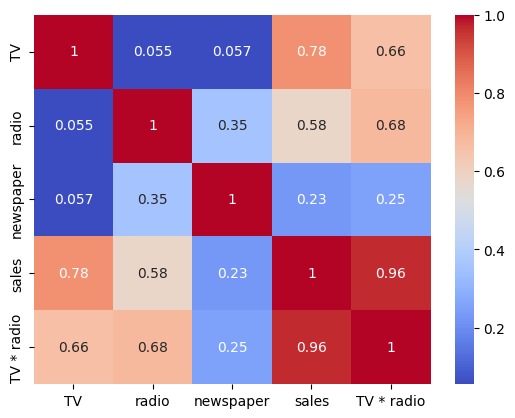

In [7]:
# We first need to import seaborn, which is a data visualization library based on matplotlib.
# It provides a high-level interface for drawing attractive and informative statistical graphics.
import seaborn as sns

# We use the heatmap function provided by seaborn to create a heatmap.
# A heatmap is a graphical representation where individual values of a matrix are represented as colors.
# It's a way of representing a correlation matrix.
# The first argument to the function is the correlation matrix that we want to visualize.
# We use the corr method provided by pandas on our DataFrame to calculate the correlation matrix.
# The "annot" argument is set to True, which means that the correlation coefficients will be written on the heatmap.
# The "cmap" argument is set to 'coolwarm', which is the color map used for the heatmap.
# 'coolwarm' is a diverging color map, which means it uses two different colors to represent low and high values.
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

## EDA: Pairplot

Next, we can use `seaborn`'s `.pairplot()` method to create scatterplots that include our new interaction column. This method produces a matrix of scatterplots, allowing us to visualize the relationship between each pair of features in our dataset. In the context of our current dataset, it will help us understand how our newly created interaction term correlates with sales as well as other features.

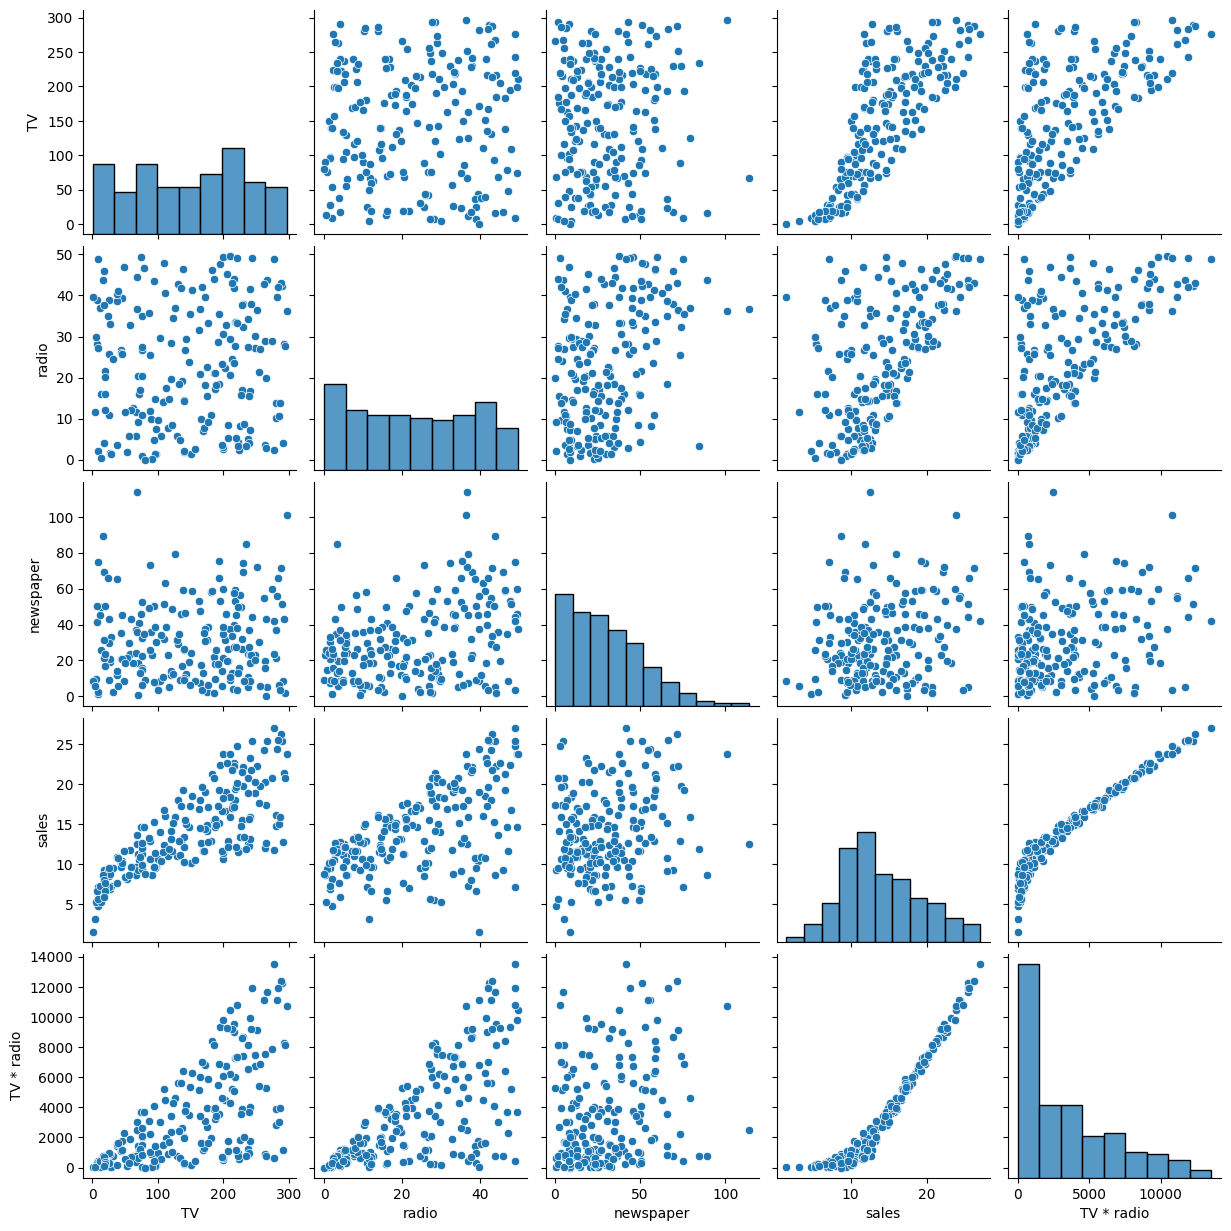

In [8]:
# Now we are going to use seaborn's pairplot function. This function creates a grid of
# Axes such that each variable in the data will be shared across the y-axes in a single row
# and the x-axes in a single column. The diagonal plots are treated differently: a univariate
# distribution plot is drawn to show the marginal distribution of the data in each column.

# By default, this function will create a grid of Axes such that each numeric variable in data will by shared
# in the y-axis across a single row and in the x-axis across a single column. The diagonal Axes are treated
# differently, drawing a plot to show the univariate distribution of the data for the variable in that column.

# It is also important to note that pairplot is a high-level interface PairGrid that is intended to make it easy
# to draw a few common styles. You should use PairGrid directly if you need more flexibility.

# In our case, we want to plot pairwise relationships in our DataFrame, which includes 'TV', 'radio',
# 'newspaper', 'sales' and the interaction term 'TV * radio'. This will allow us to visualize the relationship
# between each pair of features in our dataset.

sns.pairplot(df)

# The above line will create a scatterplot for each pair of features and histograms along the diagonal.

## Creating our Features Matrix (`X`) and Target Vector (`y`)

To incorporate our new interaction term into our model, we will update our features matrix, `X`, to include the `TV`, `radio`, `newspaper`, and `TV * radio` columns. These are the variables we believe could have an influence on our target variable, `sales`.

The `sales` column is our target vector, `y`. This is the variable we are trying to predict.

In [9]:
# Now we want to include the interaction term we just created ('TV * radio') in our features matrix.
# We do this by appending 'TV * radio' to our list of feature names.
features.append('TV * radio')

# Now our features list includes 'TV', 'radio', 'newspaper', and 'TV * radio'.

# Next, we update our features matrix 'X' to include the interaction term.
# We use pandas to select these feature columns from our DataFrame and assign them to 'X'.
# Now 'X' includes the original features (TV, radio, newspaper) as well as the interaction term (TV * radio).
X = df[features]

## Train an Adjusted Simple Linear Regression Model using PyTorch

In [10]:
# We import the necessary libraries. pandas is used for data manipulation,
# numpy is used for numerical operations, and torch is used for building the machine learning model.
import numpy as np
import torch

# Set the device we are using. This could be a GPU ("cuda"), MPS ("mps") or a CPU ("cpu")
device = torch.device("cuda" if torch.cuda.is_available() else \
                      "mps" if torch.backends.mps.is_available() else \
                      "cpu")

# Convert the target and features into PyTorch tensors and move them to the device
y = torch.tensor(y).float().to(device)
y = y.view(y.shape[0], 1)
X = torch.tensor(X.values).float().to(device)

# Define the model as a linear regression model with one input and one output.
# The model is moved to the device.
model = torch.nn.Linear(in_features = X.shape[1], out_features = 1).to(device)

# Define the loss function as mean absolute error (MAE)
loss_function = torch.nn.L1Loss()

# Define the optimizer as Adaptive Moment Estimation (Adam) with a learning rate of 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-3)

# Train the model for 10,000 epochs
for epoch in range(10_000):
    # Calculate the predictions for the current model
    y_pred = model(X)

    # Calculate the loss between the predictions and the true values
    loss = loss_function(y_pred, y)

    # Print the loss every 100 epochs
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss {loss.item()}')

    # Calculate the gradients
    loss.backward()

    # Update the weights
    optimizer.step()

    # Reset the gradients
    optimizer.zero_grad()

# Print the final loss and the model parameters
print(f'\nFinal loss: {loss.item()}')
print(f'Beta coefficients (weights): {model.weight}')
print(f'Bias: {model.bias.item()}')

# Move model and input data to CPU and calculate the final predictions
predictions = model.cpu()(X.cpu()).detach().numpy()

/var/folders/ng/r2tzgry96c3cm_rbns2hw5jr0000gn/T/ipykernel_14287/3793562824.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y).float().to(device)


Epoch 0, Loss 1533.8699951171875
Epoch 100, Loss 1165.3590087890625
Epoch 200, Loss 798.9476318359375
Epoch 300, Loss 442.2282409667969
Epoch 400, Loss 129.2740020751953
Epoch 500, Loss 52.62068176269531
Epoch 600, Loss 47.81953811645508
Epoch 700, Loss 42.68312454223633
Epoch 800, Loss 37.23171615600586
Epoch 900, Loss 31.53372573852539
Epoch 1000, Loss 25.626014709472656
Epoch 1100, Loss 19.510805130004883
Epoch 1200, Loss 13.355878829956055
Epoch 1300, Loss 7.6748576164245605
Epoch 1400, Loss 3.104853391647339
Epoch 1500, Loss 2.12180757522583
Epoch 1600, Loss 1.8317992687225342
Epoch 1700, Loss 1.619396686553955
Epoch 1800, Loss 1.5000896453857422
Epoch 1900, Loss 1.4692800045013428
Epoch 2000, Loss 1.4556505680084229
Epoch 2100, Loss 1.4508733749389648
Epoch 2200, Loss 1.4386489391326904
Epoch 2300, Loss 1.5005825757980347
Epoch 2400, Loss 1.426493525505066
Epoch 2500, Loss 1.4313446283340454
Epoch 2600, Loss 1.4175362586975098
Epoch 2700, Loss 1.4065914154052734
Epoch 2800, Loss 

In [11]:
# Call the function with the actual and predicted values, number of observations (n), and number of predictors (p)
compute_metrics(y.cpu(), predictions, y.shape[0], X.shape[1])

Mean Absolute Error: 0.7727258205413818
Mean Squared Error: 1.1794575452804565
Root Mean Squared Error: 1.0860283374786377
Residual Sum of Squares: 235.89151000976562
R-Squared: 0.9564546942710876
Adjusted R-Squared: 0.9555614590644836


/var/folders/ng/r2tzgry96c3cm_rbns2hw5jr0000gn/T/ipykernel_14287/3292100796.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_actual = torch.tensor(y_actual).float()


## `PolynomialFeatures`

How do we create interaction terms on a larger scale? In our small dataset, we have three interaction terms:

1. `TV * radio`
2. `TV * newspaper`
3. `radio * newspaper`

Creating interaction terms manually would become increasingly difficult with larger datasets. This is where `sklearn`'s `PolynomialFeatures` comes into play. `PolynomialFeatures` will return 9 columns from our original features matrix:

1. The original `TV` column
2. The original `radio` column
3. The original `newspaper` column
4. `TV^2` (`TV` squared)
5. `radio^2` (`radio` squared)
6. `TV^2` (`TV` squared)
7. `TV radio` interaction
8. `TV newspaper` interaction
9. `radio newspaper` interaction

In [12]:
# First, we specify the columns that we want to include in our features matrix.
# In our case, these columns are 'TV', 'radio', and 'newspaper'.
features: list = ['TV', 'radio', 'newspaper']

# We use pandas to select these columns from our DataFrame and assign them to 'X'.
X = df[features]

# Next, we import the PolynomialFeatures class from sklearn.preprocessing. This class generates polynomial and
# interaction features. We create an instance of this class, specifying that we do not want to include a bias
# (intercept) term in the output.
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(include_bias=False)

# We then use the fit_transform method of our PolynomialFeatures instance to generate the polynomial and
# interaction features. The output is a new features matrix 'X_poly' which includes the original features as well
# as their squares and interaction terms.
X_poly = poly.fit_transform(X)

# We can check the shape of our new features matrix 'X_poly' using the shape attribute. This will give us a tuple
# where the first element is the number of instances and the second element is the number of features.
print(X_poly.shape)

# To understand what each feature in our new matrix corresponds to, we can use the get_feature_names method of
# our PolynomialFeatures instance. We pass our original feature names to this method. The output is a list of
# strings where each string describes one column in the output matrix.
print(poly.get_feature_names_out(features))

# To make our new features matrix more understandable, we can convert it back to a DataFrame. We use the
# DataFrame constructor from pandas, and we specify our new matrix 'X_poly' as the data. For the column names, we
# use the feature names we obtained in the previous step.
poly_df = pd.DataFrame(X_poly, columns=poly.get_feature_names_out(features))

# Finally, we use the head method of our new DataFrame to display the first few rows. This allows us to inspect
# our new features matrix and confirm that it includes the original features, their squares, and interaction terms.
poly_df.head()

(200, 9)
['TV' 'radio' 'newspaper' 'TV^2' 'TV radio' 'TV newspaper' 'radio^2'
 'radio newspaper' 'newspaper^2']


,TV,radio,newspaper,TV^2,TV radio,TV newspaper,radio^2,radio newspaper,newspaper^2
0,230.1,37.8,69.2,52946.01,8697.78,15922.92,1428.84,2615.76,4788.64
1,44.5,39.3,45.1,1980.25,1748.85,2006.95,1544.49,1772.43,2034.01
2,17.2,45.9,69.3,295.84,789.48,1191.96,2106.81,3180.87,4802.49
3,151.5,41.3,58.5,22952.25,6256.95,8862.75,1705.69,2416.05,3422.25
4,180.8,10.8,58.4,32688.64,1952.64,10558.72,116.64,630.72,3410.56


## Train a Polynomial Regression Model using PyTorch

In [13]:
# Convert the target and features into PyTorch tensors and move them to the device
y = torch.tensor(y).float().to(device)
y = y.view(y.shape[0], 1)
X = torch.tensor(X.values).float().to(device)

# Define the model as a linear regression model with one input and one output.
# The model is moved to the device.
model = torch.nn.Linear(in_features = X.shape[1], out_features = 1).to(device)

# Define the loss function as mean absolute error (MAE)
loss_function = torch.nn.L1Loss()

# Define the optimizer as Adaptive Moment Estimation (Adam) with a learning rate of 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-3)

# Train the model for 10,000 epochs
for epoch in range(10_000):
    # Calculate the predictions for the current model
    y_pred = model(X)

    # Calculate the loss between the predictions and the true values
    loss = loss_function(y_pred, y)

    # Print the loss every 100 epochs
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss {loss.item()}')

    # Calculate the gradients
    loss.backward()

    # Update the weights
    optimizer.step()

    # Reset the gradients
    optimizer.zero_grad()

# Print the final loss and the model parameters
print(f'\nFinal loss: {loss.item()}')
print(f'Beta coefficients (weights): {model.weight}')
print(f'Bias: {model.bias.item()}')

# Move model and input data to CPU and calculate the final predictions
predictions = model.cpu()(X.cpu()).detach().numpy()

/var/folders/ng/r2tzgry96c3cm_rbns2hw5jr0000gn/T/ipykernel_14287/1267857208.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y).float().to(device)


Epoch 0, Loss 53.58004379272461
Epoch 100, Loss 34.82202911376953
Epoch 200, Loss 18.29503631591797
Epoch 300, Loss 9.312780380249023
Epoch 400, Loss 6.756724834442139
Epoch 500, Loss 4.419506549835205
Epoch 600, Loss 2.521775245666504
Epoch 700, Loss 1.7960090637207031
Epoch 800, Loss 1.5551217794418335
Epoch 900, Loss 1.5088168382644653
Epoch 1000, Loss 1.4877779483795166
Epoch 1100, Loss 1.4752728939056396
Epoch 1200, Loss 1.4677398204803467
Epoch 1300, Loss 1.4599556922912598
Epoch 1400, Loss 1.4520238637924194
Epoch 1500, Loss 1.4440032243728638
Epoch 1600, Loss 1.4356411695480347
Epoch 1700, Loss 1.42695951461792
Epoch 1800, Loss 1.418058156967163
Epoch 1900, Loss 1.4089126586914062
Epoch 2000, Loss 1.3999204635620117
Epoch 2100, Loss 1.3916888236999512
Epoch 2200, Loss 1.3835610151290894
Epoch 2300, Loss 1.375360369682312
Epoch 2400, Loss 1.3669379949569702
Epoch 2500, Loss 1.3589739799499512
Epoch 2600, Loss 1.3512886762619019
Epoch 2700, Loss 1.3434957265853882
Epoch 2800, Los

In [14]:
# Call the function with the actual and predicted values, number of observations (n), and number of predictors (p)
compute_metrics(y.cpu(), predictions, y.shape[0], X.shape[1])

Mean Absolute Error: 1.211153507232666
Mean Squared Error: 2.902060031890869
Root Mean Squared Error: 1.7035434246063232
Residual Sum of Squares: 580.4119873046875
R-Squared: 0.8928565979003906
Adjusted R-Squared: 0.8912166357040405


/var/folders/ng/r2tzgry96c3cm_rbns2hw5jr0000gn/T/ipykernel_14287/3292100796.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_actual = torch.tensor(y_actual).float()


In [15]:
poly_df['sales'] = y.cpu()

<Axes: >

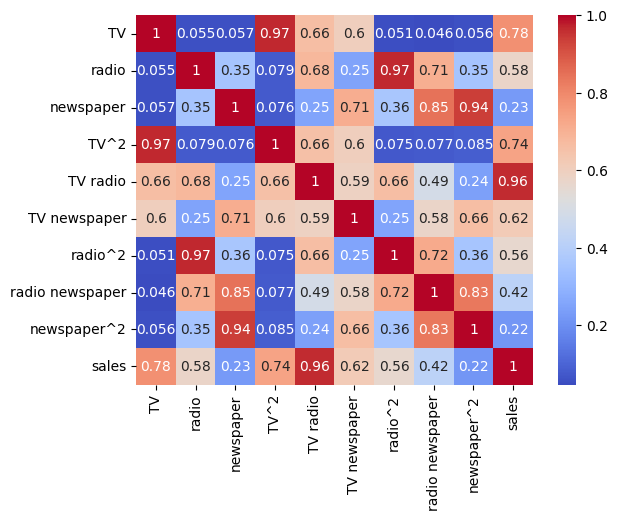

In [16]:
sns.heatmap(poly_df.corr(), annot=True, cmap='coolwarm')